# 3.2.1. GMM Cluster Analysis

<div style="text-align:justify">
GMM results trained with good data.

<div>

In [1]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from matplotlib.animation import FuncAnimation
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import joblib

run = "2-9"
path2 = "C:/Users/a00546973/Desktop/MasterGENIUS/Dimensionality_Reduction/PCA_data_"+run+".csv"
run1 = "2"
path = "C:/Users/a00546973/Desktop/MasterGENIUS/Data/cut_df_"+run1+".csv"

cut_df = pd.read_csv(path)
pca_df2 = pd.read_csv(path2)

slice_df = cut_df[(cut_df["TimeStamp"]>="2023-02-27 00:00:00") & (cut_df["TimeStamp"]<="2023-04-15 23:59:59")]
slice_pca = pca_df2[(cut_df["TimeStamp"]>="2023-02-27 00:00:00") & (cut_df["TimeStamp"]<="2023-04-15 23:59:59")]
good_data = slice_df.loc[cut_df["Alert"] == 0]
alert_data = slice_df.loc[cut_df["Alert"] != 0]

validate_df2 = cut_df[cut_df["TimeStamp"]>"2023-04-15 23:59:59"]
validate_pca2 = pca_df2[cut_df["TimeStamp"]>"2023-04-15 23:59:59"]



In [3]:
validate_pca2.describe()

pca0           pca1           pca2           pca3
count  163152.000000  163152.000000  163152.000000  163152.000000
mean        0.125036       0.015353      -0.146514       0.037365
std         1.012134       1.060565       0.910119       1.075221
min        -1.771282      -1.591552      -3.038873      -3.027782
25%        -0.552044      -0.246387      -0.827192      -0.230722
50%        -0.382109      -0.087160      -0.221557      -0.057560
75%         0.709166       0.016689       0.491505       0.124361
max         2.487657       5.249523       3.697623      10.894338

In [2]:
# Define method to split data in train and test data
def data_split(df_cut, data, ratio_train, ratio_test):
    
    temp = data
    temp.loc[:,df_cut.columns] = df_cut
    temp = temp.sample(frac=1, random_state=42)
     
    train, test, validate = np.split(temp, [int(ratio_train*len(temp)), int(ratio_test*len(temp))])
        
    return temp, train, test, validate

# Execute data split
shuffled_df, train_df, test_df,  validate_df = data_split(slice_df, slice_pca.loc[cut_df["Alert"]==0], 0.85, 0.95)

c:\Users\a00546973\Desktop\MasterGENIUS\.venv\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning:

'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.



In [102]:
len(train_df)

24738

In [3]:
pca_cols = ["pca0","pca1","pca2","pca3"]
validate_df2[pca_cols] = validate_pca2


temp = slice_pca.loc[slice_df["Alert"] != 0, pca_cols]
alert_data.loc[slice_df["Alert"]!=0, pca_cols] = temp
train_pca = train_df[pca_cols]
test_pca = test_df[pca_cols]
validate_pca = validate_df[pca_cols]
alert_pca = alert_data[pca_cols]


pca_list = [train_pca, test_pca, validate_pca, alert_pca, validate_pca2]

C:\Users\a00546973\AppData\Local\Temp\ipykernel_23904\1324403478.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\a00546973\AppData\Local\Temp\ipykernel_23904\1324403478.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\a00546973\AppData\Local\Temp\ipykernel_23904\1324403478.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [4]:
from sklearn.metrics import silhouette_score
def evaluate_gmm(data, K):
    
    n_components = range(2, K + 1)
    criteria = []
    average_score = []

    for n in n_components:
        print(f"{n}/{K}")
        gmm = GaussianMixture(n_components=n, max_iter=50, n_init=20, init_params="k-means++", random_state=42, tol=0.0001)
        labels = gmm.fit_predict(data)
        criteria.append(gmm.bic(data))  # You can use AIC or other criteria as well
        silhouette_scores = silhouette_score(data, labels, sample_size=50000)
        average_score.append(silhouette_scores.mean())
    
    best_fit = n_components[np.argmin(criteria)] 
    print(best_fit)

    
    return n_components, criteria, average_score

In [5]:
n_components, criteria, average_score = evaluate_gmm(train_pca.values, 20)

2/20


3/20
4/20
5/20
6/20
7/20
8/20
9/20
10/20
11/20
12/20
13/20
14/20


c:\Users\a00546973\Desktop\MasterGENIUS\.venv\lib\site-packages\sklearn\mixture\_base.py:268: ConvergenceWarning:

Initialization 20 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.



15/20


c:\Users\a00546973\Desktop\MasterGENIUS\.venv\lib\site-packages\sklearn\mixture\_base.py:268: ConvergenceWarning:

Initialization 20 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.



16/20


c:\Users\a00546973\Desktop\MasterGENIUS\.venv\lib\site-packages\sklearn\mixture\_base.py:268: ConvergenceWarning:

Initialization 20 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.



17/20


c:\Users\a00546973\Desktop\MasterGENIUS\.venv\lib\site-packages\sklearn\mixture\_base.py:268: ConvergenceWarning:

Initialization 20 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.



18/20


c:\Users\a00546973\Desktop\MasterGENIUS\.venv\lib\site-packages\sklearn\mixture\_base.py:268: ConvergenceWarning:

Initialization 20 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.



19/20


c:\Users\a00546973\Desktop\MasterGENIUS\.venv\lib\site-packages\sklearn\mixture\_base.py:268: ConvergenceWarning:

Initialization 20 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.



20/20


c:\Users\a00546973\Desktop\MasterGENIUS\.venv\lib\site-packages\sklearn\mixture\_base.py:268: ConvergenceWarning:

Initialization 20 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.



20


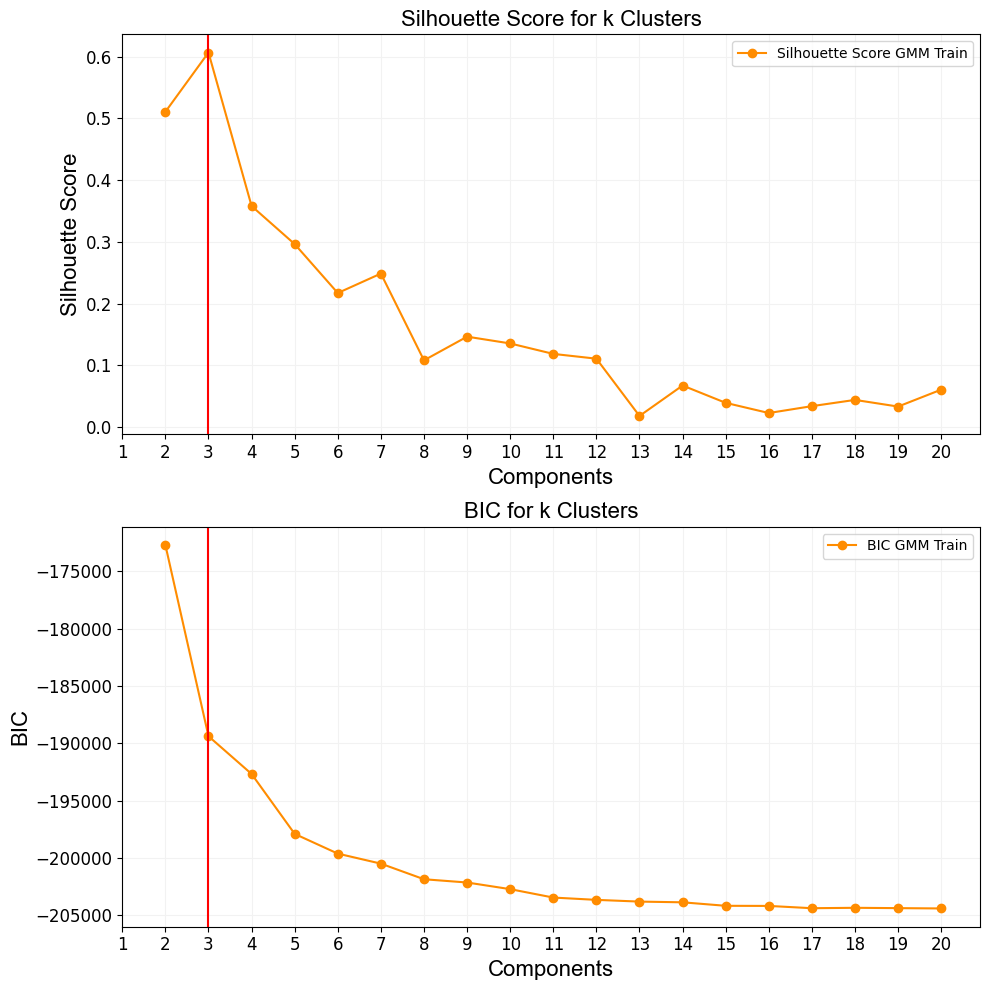

In [41]:
fig, axs = plt.subplots(2,1, figsize=(10,10))
font = {'family': 'arial',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }
axs[0].plot(n_components, average_score, label="Silhouette Score GMM Train", color ="darkorange", marker="o")
#axs[0].plot(frame2["Cluster"], frame2["Silhouette Score"], label="Silhouette Score K-Means 1-9 Test", color ="darkred", marker="o")

axs[1].plot(n_components, criteria, label="BIC GMM Train", color ="darkorange", marker="o")
#axs[1].plot(frame2["Cluster"], frame2["Inertia"], label="Inertia K-Means 1-9 Test", color ="darkred", marker="o")

axs[0].set_xlabel("Components", fontdict=font)
axs[0].set_ylabel("Silhouette Score", fontdict=font)
axs[0].set_xticks(range(1,20+1,1))
axs[0].legend() 
axs[0].set_title("Silhouette Score for k Clusters", fontdict=font)
axs[0].axvline(x=3, color='red', linestyle='-')    

axs[1].set_xlabel("Components", fontdict=font)
axs[1].set_ylabel("BIC", fontdict=font)
axs[1].set_xticks(range(1,20+1,1))
axs[1].legend() 
axs[1].set_title("BIC for k Clusters", fontdict=font)
axs[1].axvline(x=3, color='red', linestyle='-')    

axs[0].grid(color="0.95")
axs[1].grid(color="0.95")
for ax in axs:
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

plt.tight_layout()
path = "S-Score_BIC_2-2_2-9"
plt.savefig(path)
plt.show()   
    

### Visualisation of Clustering
Above, the Silhouette Scores and Inertia values were calculated and plotted for each dimensionality reduction methods. The best fitting number of clusters per method can be easily derived from the plots by extracting the maximum of the Silhouette Score and identifying the elbow of the Inertia values. Hence, 7 Clusters were selected as the best number of clusters.

In [4]:

# Fit Gaussian Mixture Model
clusters = 3
cmap = plt.cm.get_cmap("turbo", clusters)

gmm = GaussianMixture(n_components=clusters, max_iter=50, n_init=20, init_params="k-means++", random_state=42, tol=0.0001)
gmm.fit(train_pca.values)
path = "C:/Users/a00546973/Desktop/MasterGENIUS/Models/GMM_pca_GHS2002_"+run+"2.pkl"
joblib.dump(gmm,path)
# Predict cluster labels
labels = gmm.predict(train_pca.values)
train_df["GMM"] = labels



C:\Users\a00546973\AppData\Local\Temp\ipykernel_23904\3192734144.py:3: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



C:\Users\a00546973\AppData\Local\Temp\ipykernel_23904\3029294728.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\a00546973\AppData\Local\Temp\ipykernel_23904\3029294728.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



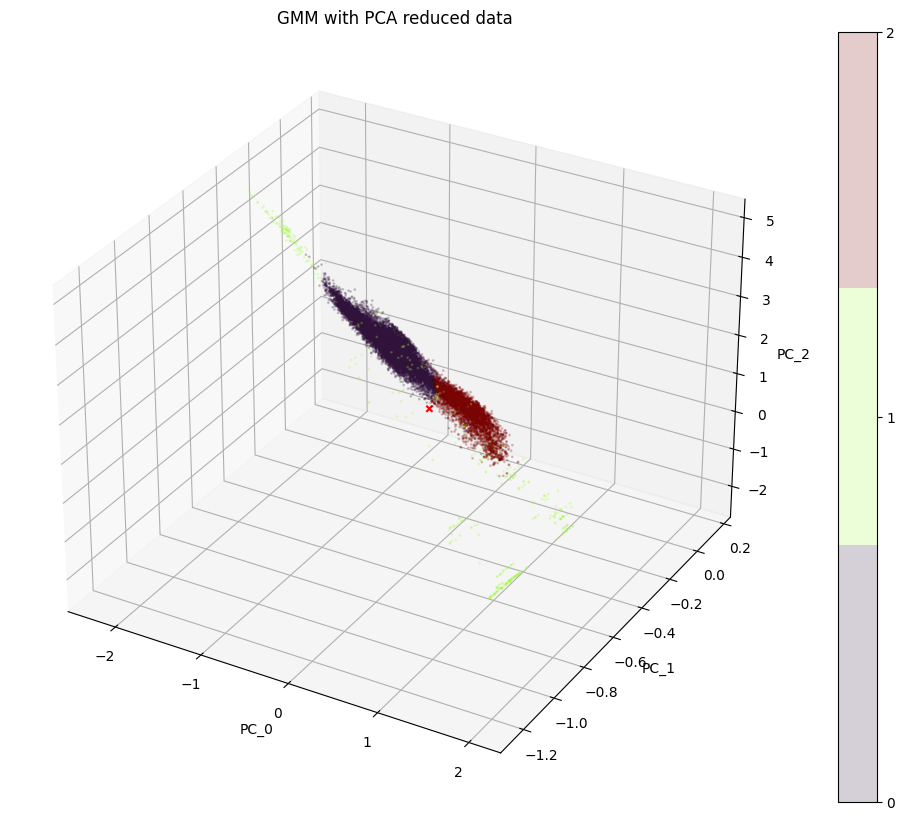

In [5]:
test_df["GMM"] = gmm.predict(test_pca.values)
validate_df["GMM"] = gmm.predict(validate_pca.values)
alert_data["GMM"] = gmm.predict(alert_pca.values)
validate_df2["GMM"] = gmm.predict(validate_pca2.values)


df_list = [train_df, test_df, validate_df, alert_data, validate_df2]

# Get cluster means and covariance matrices
means = gmm.means_
covariances = gmm.covariances_

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(projection="3d")

x = train_pca.iloc[:,0]
y = train_pca.iloc[:,1]
z = train_pca.iloc[:,2]
ax.set_xlabel("PC_0")
ax.set_ylabel("PC_1")
ax.set_zlabel("PC_2")
# Plot the data points with colors representing the clusters
p = ax.scatter(x,y,z, c=labels,s=1, alpha=0.2 ,cmap=cmap)
ax.scatter(means[:, 0], means[:, 1], means[:,2], marker='x', color='r', label='Cluster Centers')
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
plt.title("GMM with PCA reduced data")
ax.set_position([left, bottom, width, height])
plt.colorbar(p, ticks=range(clusters))
plt.show()

In [6]:
def get_score(model, df, pca_data):
    test_score = model.score_samples(pca_data.values)
    pc_list = ["pca0","pca1","pca2","pca3"]
    
    df["score"] = test_score
    df[pc_list] = pca_data

    for k in df["GMM"].unique():
        #for alert in df["Alert"].unique():
        df.loc[(df["GMM"] == k), "score_mean"] = df.loc[(df["GMM"] == k),"score"].mean() #& (df["Alert"] == alert)
    metric = df[["GMM","score_mean"]].value_counts() 
    
    return  df, metric

result_df, metric = get_score(gmm, train_df, train_pca)

In [7]:
def recombine_df(model, df_list, pca_list):
    
    result_list = []
    for i in range(0,len(df_list)):
        print(i)
        temp_df, temp_metric = get_score(model, df_list[i], pca_list[i])
        result_list.append(temp_df)
        print(temp_metric)
    
    comb_df = pd.concat(result_list, join = "outer")
    comb_df.sort_index(inplace=True)
    
    return comb_df

In [8]:
comb_df = recombine_df(gmm, df_list, pca_list)

0
GMM  score_mean
0     4.253712     18717
2     3.437897      5423
1    -5.607037       598
Name: count, dtype: int64
1
GMM  score_mean
0     4.258306     2219
2     3.361003      615
1    -5.621172       76
Name: count, dtype: int64
2
GMM  score_mean
0     4.232079     1127
2     3.488792      283
1    -5.810604       46
Name: count, dtype: int64
3
GMM  score_mean   
1    -24743.159694    1297
Name: count, dtype: int64
4


C:\Users\a00546973\AppData\Local\Temp\ipykernel_23904\1160508414.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\a00546973\AppData\Local\Temp\ipykernel_23904\1160508414.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\a00546973\AppData\Local\Temp\ipykernel_23904\1160508414.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

C:\Users\a00546973\AppData\Local\Temp\ipykernel_23904\1160508414.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



GMM  score_mean  
2     3.502708       67689
1    -8181.039298    54626
0     3.880740       40837
Name: count, dtype: int64


In [9]:
comb_df.loc[(comb_df["Alert"] == 0) & (comb_df["GMM"]==0), ["pca0","pca1","pca2","pca3","score"]
            ].describe().round(2)

pca0      pca1      pca2      pca3     score
count  62900.00  62900.00  62900.00  62900.00  62900.00
mean      -0.77     -0.17      0.80     -0.22      4.01
std        0.18      0.07      0.60      0.17      1.45
min       -1.70     -0.48     -1.17     -1.08    -10.10
25%       -0.89     -0.22      0.33     -0.32      3.40
50%       -0.74     -0.16      0.70     -0.21      4.23
75%       -0.63     -0.11      1.16     -0.11      5.00
max       -0.08      0.08      3.41      0.54      6.21

In [10]:
comb_df.loc[(comb_df["Alert"] == 0) & (comb_df["GMM"]==1), ["pca0","pca1","pca2","pca3","score"]
            ].describe().round(2)

pca0      pca1      pca2      pca3     score
count  40270.00  40270.00  40270.00  40270.00  40270.00
mean       1.48     -0.92     -0.05      0.10    -15.28
std        0.67      0.40      0.92      2.11     48.97
min       -2.25     -1.59     -3.04     -3.03   -306.58
25%        1.16     -1.31     -0.83     -0.96     -8.15
50%        1.64     -0.93     -0.00     -0.36     -6.91
75%        2.02     -0.59      0.74     -0.07     -5.40
max        2.17      0.33      5.06     10.89     -2.92

In [11]:
comb_df.loc[(comb_df["Alert"] == 0) & (comb_df["GMM"]==2), ["pca0","pca1","pca2","pca3","score"]
            ].describe().round(2)

pca0      pca1      pca2      pca3     score
count  74010.00  74010.00  74010.00  74010.00  74010.00
mean      -0.37     -0.01     -0.70      0.08      3.50
std        0.16      0.07      0.50      0.20      1.59
min       -0.93     -0.34     -2.60     -0.68     -9.41
25%       -0.48     -0.06     -1.03     -0.05      3.08
50%       -0.41     -0.01     -0.65      0.04      3.98
75%       -0.31      0.04     -0.32      0.16      4.51
max        0.38      0.27      0.79      1.09      5.33

In [13]:
comb_df.loc[comb_df["Alert"]!=0, ["pca0","pca1","pca2","pca3","score"]
            ].describe().round(2)

pca0      pca1      pca2      pca3     score
count  16373.00  16373.00  16373.00  16373.00  16373.00
mean       0.95      2.99      0.26      0.24 -29217.50
std        1.11      0.60      1.55      0.50  18572.63
min       -1.17      1.14     -2.36     -2.46 -57169.18
25%       -0.01      2.54     -1.15      0.11 -50501.62
50%        0.18      2.66     -0.35      0.36 -13991.10
75%        2.27      3.37      1.99      0.58 -13117.37
max        2.49      5.25      3.80      3.32  -3235.50

In [12]:
comb_df.loc[comb_df["Alert"]==1, ["pca0","pca1","pca2","pca3","score"]
            ].describe().round(2)

pca0    pca1    pca2    pca3    score
count  206.00  206.00  206.00  206.00   206.00
mean    -0.11    1.36   -1.02    0.46 -3727.83
std      0.12    0.08    0.16    0.18   268.21
min     -0.32    1.14   -1.51    0.06 -4047.49
25%     -0.20    1.31   -1.13    0.32 -3928.50
50%     -0.14    1.38   -1.00    0.44 -3873.29
75%     -0.04    1.43   -0.92    0.57 -3403.51
max      0.20    1.53   -0.59    0.90 -3235.50

In [13]:
comb_df.loc[comb_df["Alert"]==2, ["pca0","pca1","pca2","pca3","score"]
            ].describe().round(2)

pca0     pca1     pca2     pca3     score
count  9167.00  9167.00  9167.00  9167.00   9167.00
mean      0.01     2.56    -0.93     0.54 -13417.80
std       0.16     0.10     0.47     0.23    797.60
min      -1.17     1.80    -2.36    -2.46 -17456.74
25%      -0.09     2.49    -1.31     0.45 -13586.72
50%       0.02     2.57    -1.09     0.56 -13193.27
75%       0.11     2.62    -0.56     0.66 -13009.64
max       1.41     2.97     2.91     1.38 -12206.44

In [14]:
comb_df.loc[comb_df["Alert"]==4, ["pca0","pca1","pca2","pca3","score"]
            ].describe().round(2)

pca0     pca1     pca2     pca3     score
count  7000.00  7000.00  7000.00  7000.00   7000.00
mean      2.20     3.59     1.86    -0.15 -50658.47
std       0.30     0.37     0.94     0.49    437.65
min      -0.25     3.21    -1.45    -2.23 -57169.18
25%       2.08     3.31     1.31    -0.38 -50901.44
50%       2.34     3.44     2.19     0.05 -50544.69
75%       2.39     3.79     2.60     0.16 -50428.40
max       2.49     5.25     3.80     3.32 -49422.38

In [15]:
# Define a dictionary to map Alerts values to symbols
alerts_to_symbol = {
    0: "circle-open",    
    1: "circle-open",    
    2: "circle",
    3: "diamond",
    4: "square" # Add more mappings as needed for other alert values
}
comb_df["Symbol"] = comb_df["Alert"].map(alerts_to_symbol)
sample_df = comb_df.sample(20000)

fig = go.Figure(data=[go.Scatter3d(x=sample_df["pca0"],y=sample_df["pca1"],z=sample_df["pca2"],mode="markers",
                                   marker = dict(
                                        size=3,
                                        color=sample_df["GMM"],
                                        cmax=sample_df["GMM"].max(),
                                        cmin=0,
                                        colorbar=dict(title="Cluster"),
                                        colorscale="turbo",
                                        symbol=sample_df["Symbol"],
                                        opacity=0.5
                                   ))])

fig.update_layout(
    width=1200,  # Set the width of the plot in pixels
    height=800,  # Set the height of the plot in pixels
    font=dict(
        family="Arial",
        size=14,
        color="Black"
    )
)
iplot(fig, filename="cluster_gmm")

### Analysing Clustering

<div stlye="text-align:justify">
The plot of the clustering above seems to identify different pump states because a clear separation of the clusters is visible. It is also noteworthy, that the GMM algorithm seems to be advantegous in identifying the different groups of data since it is visible that the colored cluster capture the shape of the data in the three dimensional space. The KMeans algorithm proves to be disadvantegous in the identifying the shape of the data groups. This can be explained by the differences in the algorithms itself. While GMM determines the clusters based on a mixture of several gaussian distribution and thereby suitable to identify clusters of different shapes and sizes, the KMeans algorithm is limited to spherical clusters with centroids as center that determine the clusters. Thus, the KMeans algorithm is not optimal in identifying the groups of data as seen in the plot above.  Therefore, the clustering needs to be further analysed based on the clustering of significant features, like the type of pump, serial number, and the P_In and T_Out values. To identify how the clusters were build, the data will be retransformed into their numerical values and the clusters will be used to identify their characteristics.

<div>

In [16]:
dist = pd.DataFrame(columns=["Train","Test"])
dist["Train"] = train_df["GMM"].value_counts() / len(train_df)
dist["Test"] = test_df["GMM"].value_counts() / len(test_df)
dist["Validate"] = validate_df["GMM"].value_counts() / len(validate_df)
dist["Alerts"] = alert_data["GMM"].value_counts() / len(alert_data)
dist["Validate2"] = validate_df2["GMM"].value_counts() / len(validate_df2)
dist = (dist*100).round(2)
dist

Train   Test  Validate  Alerts  Validate2
GMM                                           
0    75.66  76.25     77.40     NaN      25.03
2    21.92  21.13     19.44     NaN      41.49
1     2.42   2.61      3.16   100.0      33.48

In [17]:
validate_df2[["GMM","Alert"]].value_counts()

GMM  Alert
2    0.0      67689
0    0.0      40837
1    0.0      39550
     2.0       8522
     4.0       6554
Name: count, dtype: int64

In [18]:
validate_df2.loc[(validate_df2["Alert"] == 4) & (validate_df2["GMM"]==1
                    ), ["pca0","pca1","pca2","pca3","score"]].describe().round(1)

pca0    pca1    pca2    pca3    score
count  6554.0  6554.0  6554.0  6554.0   6554.0
mean      2.2     3.6     1.8    -0.2 -50667.3
std       0.3     0.4     0.9     0.5    437.5
min      -0.3     3.2    -1.4    -2.2 -57169.2
25%       2.1     3.3     1.3    -0.4 -50928.1
50%       2.3     3.4     2.2     0.1 -50554.4
75%       2.4     3.8     2.6     0.2 -50434.7
max       2.5     5.2     3.7     3.3 -49422.4

In [19]:
validate_df2.loc[(validate_df2["Alert"] == 2) & (validate_df2["GMM"]==1
                    ), ["pca0","pca1","pca2","pca3","score"]].describe().round(1)

pca0    pca1    pca2    pca3    score
count  8522.0  8522.0  8522.0  8522.0   8522.0
mean      0.0     2.6    -0.9     0.5 -13402.1
std       0.2     0.1     0.5     0.2    804.4
min      -1.2     1.8    -2.4    -2.5 -17456.7
25%      -0.1     2.5    -1.3     0.4 -13552.6
50%       0.0     2.6    -1.1     0.6 -13185.3
75%       0.1     2.6    -0.6     0.7 -13009.0
max       1.3     3.0     2.9     1.4 -12206.4

In [20]:
validate_df2.loc[(validate_df2["Alert"] == 0) & (validate_df2["GMM"]==1
                    ), ["pca0","pca1","pca2","pca3","score"]].describe().round(1)

pca0     pca1     pca2     pca3    score
count  39550.0  39550.0  39550.0  39550.0  39550.0
mean       1.5     -0.9     -0.1      0.1    -15.5
std        0.6      0.4      0.9      2.1     49.4
min       -1.8     -1.6     -3.0     -3.0   -306.6
25%        1.2     -1.3     -0.8     -1.0     -8.2
50%        1.7     -0.9     -0.0     -0.4     -7.0
75%        2.0     -0.6      0.7     -0.1     -5.4
max        2.2      0.3      3.7     10.9     -2.9

In [21]:
if "Symbol" in train_df.columns:
    train_df.drop(columns=["Symbol"], inplace=True)

if "Symbol" in test_df.columns:
    test_df.drop(columns=["Symbol"], inplace=True)

    
result_data = comb_df
run ="2-9"
path = "C:/Users/a00546973/Desktop/MasterGENIUS/Data/result_data_"+str(run)+".csv"

temp = pd.read_csv(path)
result_data["KMeans"] = temp["KMeans"]

result_data.to_csv(path, index=False)

In [22]:
result_data["GMM"].value_counts()

GMM
2    74010
0    62900
1    56643
Name: count, dtype: int64

In [23]:

parameter_comb = {
        "0":["P_In","P_Out","T_Out","Current","MotorSpeed","Power"],
        "1":["P_In","P_Out","T_Out","Current","MotorSpeed","Power","RunningHours","TotalCO2Impact","TotalEnergyConsumption"],
        "2":["P_In","P_Out","T_Out","Current","MotorSpeed","Power","dT","dE","dCO2"],
        "3":["P_In","P_Out","T_Out","Current","MotorSpeed","Power","dT","dE","dCO2","Alert","Reopen count"],
        "4":["P_In","P_Out","T_Out","Current","MotorSpeed","Power","dT","dE","dCO2","Alert","Reopen count","PressureRange"],
        "5":["P_In","P_Out","T_Out","Current","MotorSpeed","Power","dT","dE","dCO2","Alert","Reopen count","dP"],
        "6":["P_In","P_Out","T_Out","Current","MotorSpeed","Power","dT","dE","Alert","Reopen count"],
        "7":["P_In","P_Out","T_Out","Current","MotorSpeed","Power","dT","dE","Alert","Reopen count","PressureRange"],
        "8":["P_In","P_Out","T_Out","Current","MotorSpeed","Power","dT","dE","Alert","Reopen count","dP"],
        "9":["P_In","P_Out","T_Out","Current","MotorSpeed","Power","dE","Alert","Reopen count","dP"],
    }

data = comb_df[parameter_comb["9"]]
temp = comb_df[["GMM","score"]]
data.loc[:,["GMM","score"]] = temp

In [24]:
def get_definition(data, name):
    # This code is used to iterate through the clusters of the dataset and get their statistics
    df_list = []
    for cluster in pd.unique(data[name]):
        metric = data.loc[data[name]==cluster].describe().round(2)
        metric.index = pd.MultiIndex.from_product([[cluster], metric.index])
        df_list.append(metric)
        
        result_df = pd.concat(df_list, axis=0)
        result_df = result_df.sort_index(axis=0)
    
    return result_df    

m_df = get_definition(train_df, "GMM")
path = "cluster_description_GMM_PCA_"+run+"2.xlsx"
m_df.to_excel(path)

In [25]:
import matplotlib as mpl
from matplotlib.colors import Normalize

def plot_cluster(data, pump, cluster,r1,r2):
    
    try:
        fig, axs = plt.subplots(9,1, figsize=(20,40))
        
        start_time = r1
        end_time = r2 
        
        filtered_df = data[(data['TimeStamp'] >= start_time) & (data['TimeStamp'] <= end_time) & (data['SnCode'] == pump)]

        k = data[cluster].max()+1    
        cmap = mpl.cm.get_cmap("turbo", k)
    
        norm = Normalize(vmin=0, vmax=data[cluster].unique().max())
        
        sc1 = axs[0].scatter(filtered_df["TimeStamp"],filtered_df["Power"], c=filtered_df[cluster], cmap=cmap, s=3, norm=norm)
        axs[0].set_ylabel("Power [kW]")
        axs[0].set_title(f"{cluster} Parameters\nPower of pump {pump} from {start_time} to {end_time}")
        cbar1 = fig.colorbar(sc1, ax=axs[0])
        cbar1.set_label('Clusters')
    
        sc2 = axs[1].scatter(filtered_df["TimeStamp"],filtered_df["P_In"], c=filtered_df[cluster], cmap=cmap, s=3, norm=norm)
        axs[1].set_ylabel("P_In [mbar]")
        axs[1].set_title(f"P_In of pump {pump} from {start_time} to {end_time}")
        cbar2 = fig.colorbar(sc2, ax=axs[1])
        cbar2.set_label('Clusters')
        
        sc3 = axs[2].scatter(filtered_df["TimeStamp"],filtered_df["T_Out"], c=filtered_df[cluster], cmap=cmap, s=3, norm=norm)
        axs[2].set_ylabel("T_Out [°C]")
        axs[2].set_title(f"T_Out of pump {pump} from {start_time} to {end_time}")
        cbar3 = fig.colorbar(sc3, ax=axs[2])
        cbar3.set_label('Clusters')
        
        sc4 = axs[3].scatter(filtered_df["TimeStamp"],filtered_df["MotorSpeed"], c=filtered_df[cluster], cmap=cmap, s=3, norm=norm)
        axs[3].set_ylabel("MotorSpeed [rpm]")
        axs[3].set_title(f"MotorSpeed of pump {pump} from {start_time} to {end_time}")
        cbar4 = fig.colorbar(sc4, ax=axs[3])
        cbar4.set_label('Clusters')
        
        sc5 = axs[4].scatter(filtered_df["TimeStamp"],filtered_df["pca0"], c=filtered_df[cluster], cmap=cmap, s=3, norm=norm)
        axs[4].plot(filtered_df["TimeStamp"],filtered_df["pca0_mean"], color="red",linestyle="--", alpha=0.5)
        axs[4].axhline(y=(data.loc[(data["Alert"]==0) & (data["GMM"]==0) | (data["GMM"]==2),"pca0"].mean()), color="grey", linestyle="-")
        axs[4].axhline(y=(data.loc[(data["Alert"]==0) & (data["GMM"]==0) | (data["GMM"]==2),"pca0"].mean())+0.3, color="green", linestyle="--")
        axs[4].axhline(y=(data.loc[(data["Alert"]==0) & (data["GMM"]==0) | (data["GMM"]==2),"pca0"].mean())-0.3, color="green", linestyle="--")
        axs[4].set_ylabel("Principle Component 0")
        axs[4].set_title(f"Principle Component 0 of pump {pump} from {start_time} to {end_time}")
        cbar5 = fig.colorbar(sc5, ax=axs[4])
        cbar5.set_label('Clusters')
        
        sc6 = axs[5].scatter(filtered_df["TimeStamp"],filtered_df["pca1"], c=filtered_df[cluster], cmap=cmap, s=3, norm=norm)
        axs[5].plot(filtered_df["TimeStamp"],filtered_df["pca1_mean"], color="red",linestyle="--", alpha=0.5)
        axs[5].axhline(y=(data.loc[(data["Alert"]==0) & (data["GMM"]==0) | (data["GMM"]==2),"pca1"].mean()), color="grey", linestyle="-")
        axs[5].axhline(y=(data.loc[(data["Alert"]==0) & (data["GMM"]==0) | (data["GMM"]==2),"pca1"].mean())+0.3, color="green", linestyle="--")
        axs[5].axhline(y=(data.loc[(data["Alert"]==0) & (data["GMM"]==0) | (data["GMM"]==2),"pca1"].mean())-0.3, color="green", linestyle="--")
        axs[5].set_ylabel("Principle Component 1")
        axs[5].set_title(f"Principle Component 1 of pump {pump} from {start_time} to {end_time}")
        cbar6 = fig.colorbar(sc6, ax=axs[5])
        cbar6.set_label('Clusters')
        
        sc7 = axs[6].scatter(filtered_df["TimeStamp"],filtered_df["pca2"], c=filtered_df[cluster], cmap=cmap, s=3, norm=norm)
        axs[6].plot(filtered_df["TimeStamp"],filtered_df["pca2_mean"], color="red",linestyle="--", alpha=0.5)
        axs[6].axhline(y=(data.loc[(data["Alert"]==0) & (data["GMM"]==0) | (data["GMM"]==2),"pca2"].mean()), color="grey", linestyle="-")
        axs[6].axhline(y=(data.loc[(data["Alert"]==0) & (data["GMM"]==0) | (data["GMM"]==2),"pca2"].mean())+0.75, color="green", linestyle="--")
        axs[6].axhline(y=(data.loc[(data["Alert"]==0) & (data["GMM"]==0) | (data["GMM"]==2),"pca2"].mean())-0.75, color="green", linestyle="--")
        axs[6].set_ylabel("Principle Component 2")
        axs[6].set_title(f"Principle Component 2 of pump {pump} from {start_time} to {end_time}")
        cbar7 = fig.colorbar(sc7, ax=axs[6])
        cbar7.set_label('Clusters')
        
        sc8 = axs[7].scatter(filtered_df["TimeStamp"],filtered_df["pca3"], c=filtered_df[cluster], cmap=cmap, s=3,norm=norm)
        axs[7].plot(filtered_df["TimeStamp"],filtered_df["pca3_mean"], color="red",linestyle="--", alpha=0.5)
        axs[7].axhline(y=(data.loc[(data["Alert"]==0) & (data["GMM"]==0) | (data["GMM"]==2),"pca3"].mean()), color="grey", linestyle="-")
        axs[7].axhline(y=(data.loc[(data["Alert"]==0) & (data["GMM"]==0) | (data["GMM"]==2),"pca3"].mean())+0.5, color="green", linestyle="--")
        axs[7].axhline(y=(data.loc[(data["Alert"]==0) & (data["GMM"]==0) | (data["GMM"]==2),"pca3"].mean())-0.5, color="green", linestyle="--")
        axs[7].set_ylabel("Principle Component 3")
        axs[7].set_title(f"Principle Component 3 of pump {pump} from {start_time} to {end_time}")
        cbar8 = fig.colorbar(sc8, ax=axs[7])
        cbar8.set_label('Clusters')
        
      
        
        sc9 = axs[8].scatter(filtered_df["TimeStamp"],filtered_df["score"], c=filtered_df[cluster], cmap=cmap, s=3, norm=norm)
        axs[8].set_ylabel("GMM Score (log)")
        axs[8].set_title(f"GMM Score of pump {pump} from {start_time} to {end_time}")
        axs[8].set_yscale("symlog")
        axs[8].axhline(y=(data.loc[(data["Alert"]==0) & (data["GMM"]==0) | (data["GMM"]==2),"score"].mean()), color="grey", linestyle="-")
        axs[8].axhline(y=(data.loc[(data["Alert"]==0) & (data["GMM"]==0) | (data["GMM"]==2),"score"].mean())+2, color="green", linestyle="--")
        axs[8].axhline(y=(data.loc[(data["Alert"]==0) & (data["GMM"]==0) | (data["GMM"]==2),"score"].mean())-2, color="green", linestyle="--")
        axs[8].axhline(y=-12, color='blue', linestyle='-', alpha =0.5)    
        axs[8].axhline(y=-4, color='blue', linestyle='-', alpha =0.5)   
        axs[8].plot(filtered_df["TimeStamp"], filtered_df["score_rolling_mean"], c = "r", linestyle="--", alpha=0.5)
        cbar8 = fig.colorbar(sc9, ax=axs[8])
        cbar8.set_label('Clusters')
    
    except KeyError as err:
        print(f"A KeyError occured: {err}")
    
    return plt.show()


In [26]:
# prepare data of interest
cluster_DF = comb_df.copy()
cluster_DF["TimeStamp"] = pd.to_datetime(comb_df["TimeStamp"])

cluster_DF[["pca0_mean","pca1_mean","pca2_mean","pca3_mean","score_rolling_mean"]] = cluster_DF[::-1][["pca0","pca1","pca2","pca3","score"]].rolling(window=20,min_periods=1, win_type='triang', closed="right").mean()[::-1] #

In [27]:
pump = 44

max = cluster_DF.loc[cluster_DF["SnCode"]==pump,["TimeStamp"]].max()
min = cluster_DF.loc[cluster_DF["SnCode"]==pump,["TimeStamp"]].min()
print(f"min: {min}\nmax: {max}")

min: TimeStamp   2023-02-27 00:00:45
dtype: datetime64[ns]
max: TimeStamp   2023-10-25 07:01:12
dtype: datetime64[ns]


C:\Users\a00546973\AppData\Local\Temp\ipykernel_23904\2416326727.py:15: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



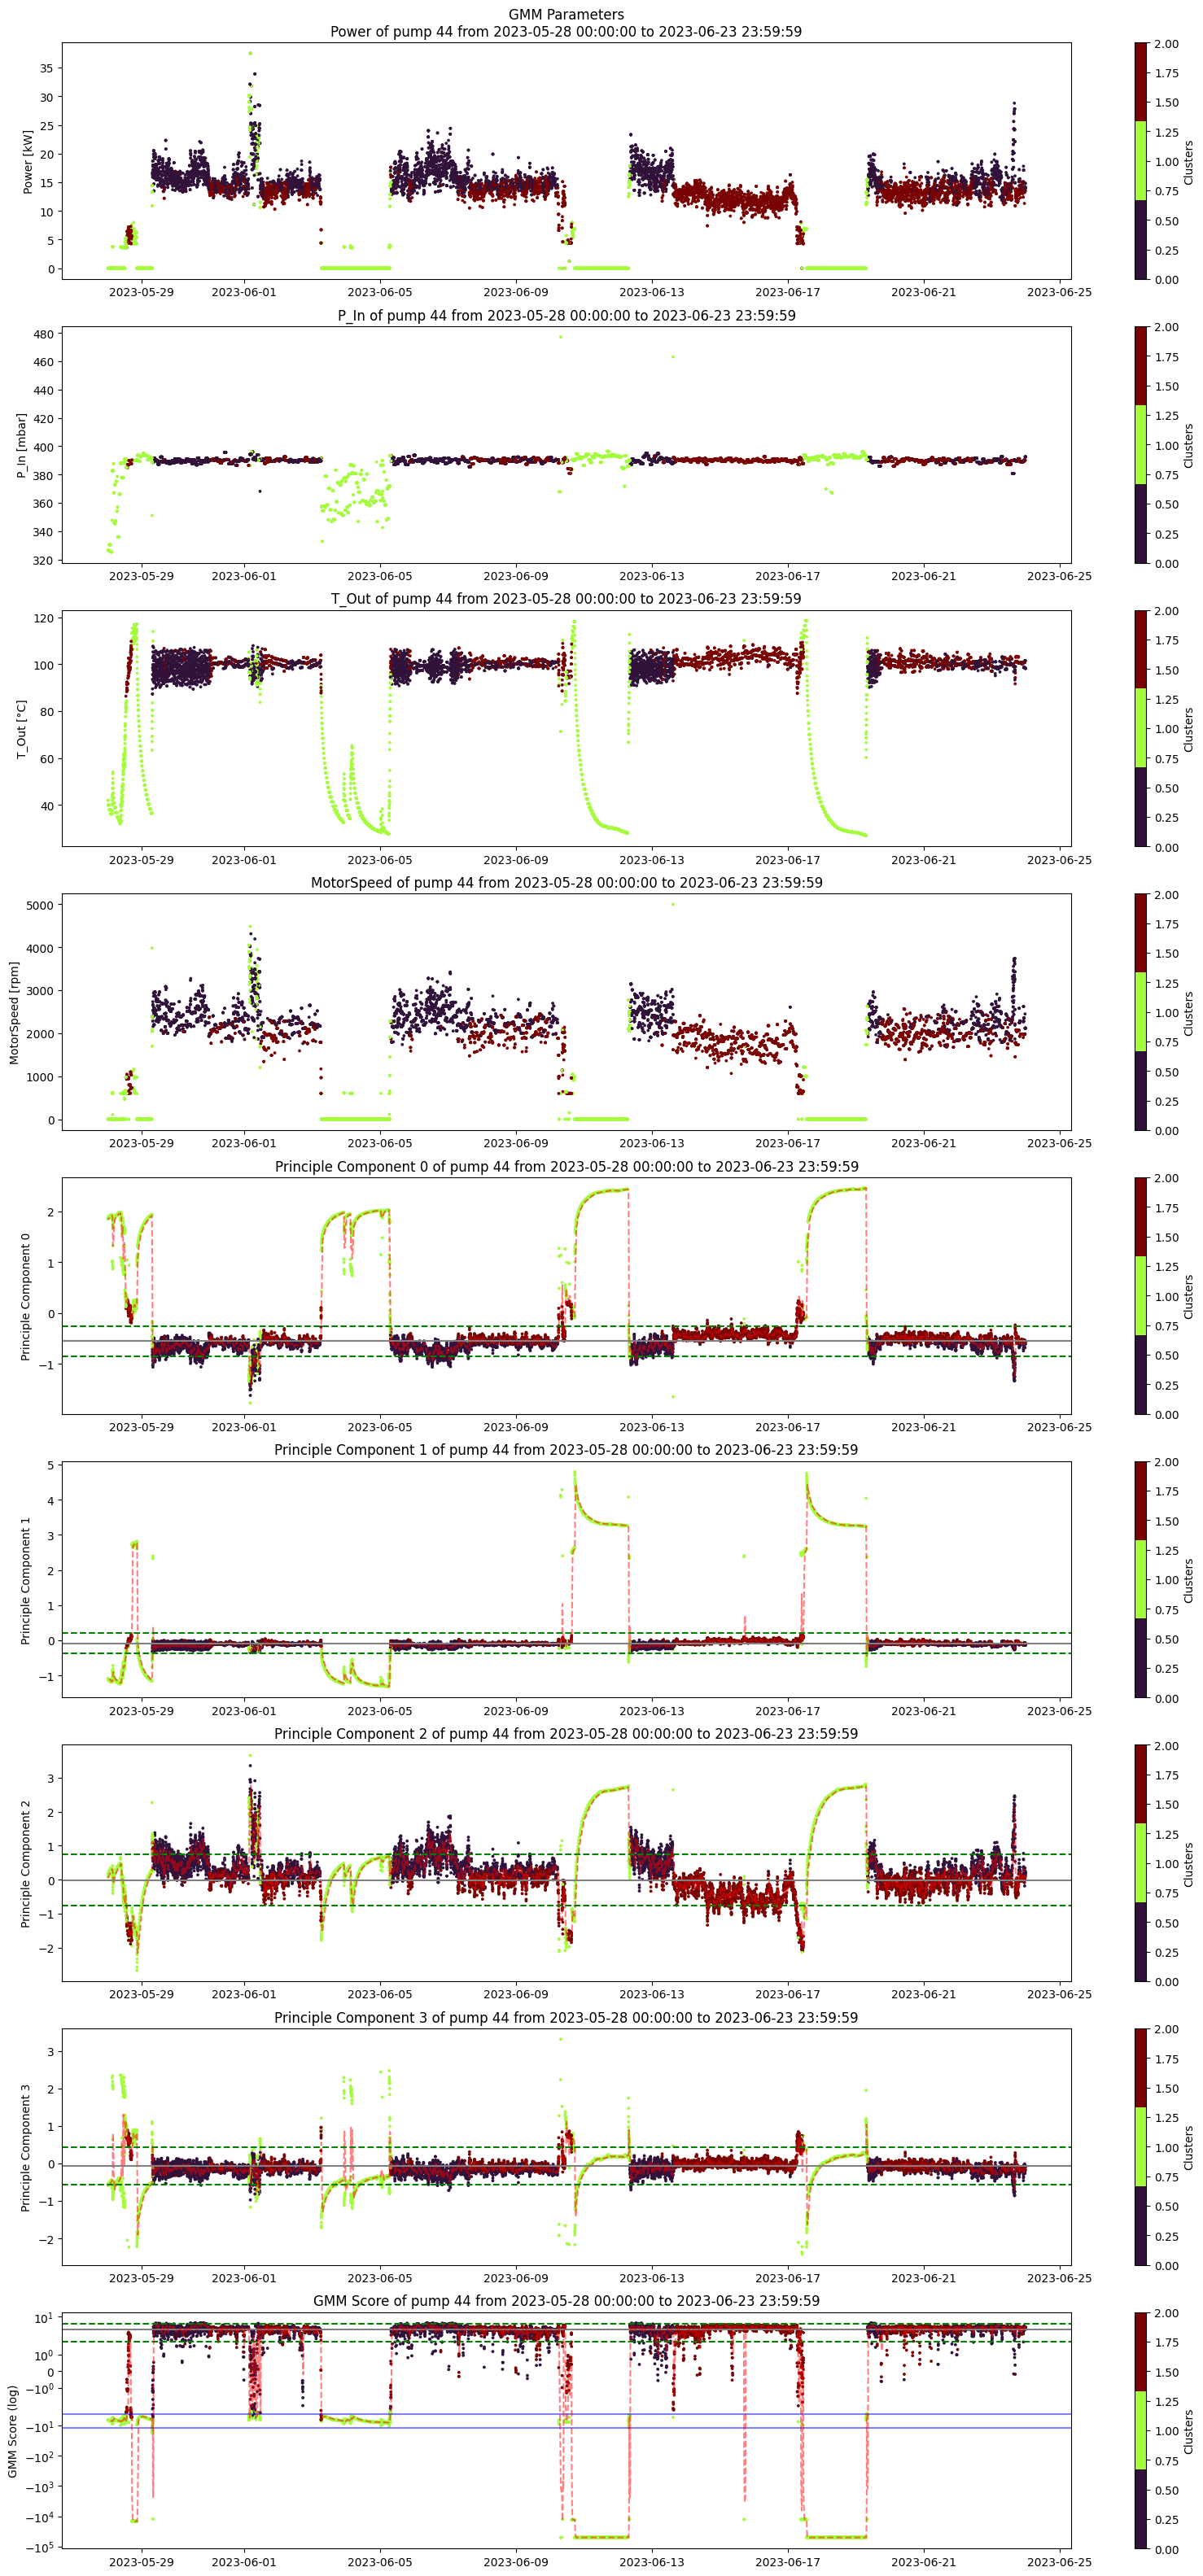

In [28]:
plot_cluster(cluster_DF,pump,"GMM","2023-05-28 00:00:00","2023-06-23 23:59:59")

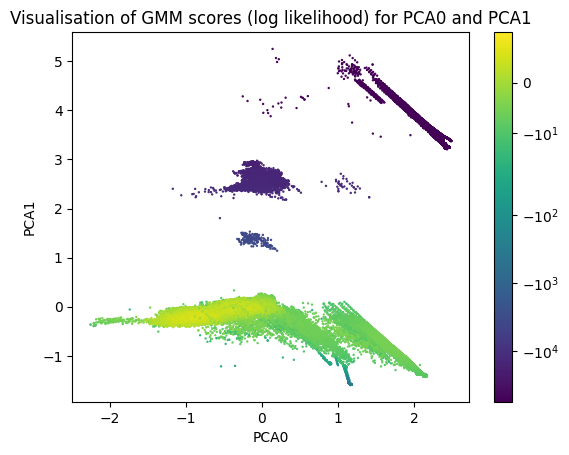

In [96]:
# Plot GMM score distribution

from matplotlib.colors import SymLogNorm

norm = SymLogNorm(linthresh=15,vmin=-55000, vmax=10)

plt.scatter(comb_df["pca0"].values, comb_df["pca1"].values, c=comb_df["score"].values, s=0.5, norm=norm)
plt.title("Visualisation of GMM scores (log likelihood) for PCA0 and PCA1")
plt.xlabel("PCA0")
plt.ylabel("PCA1")
plt.colorbar()
plt.show()

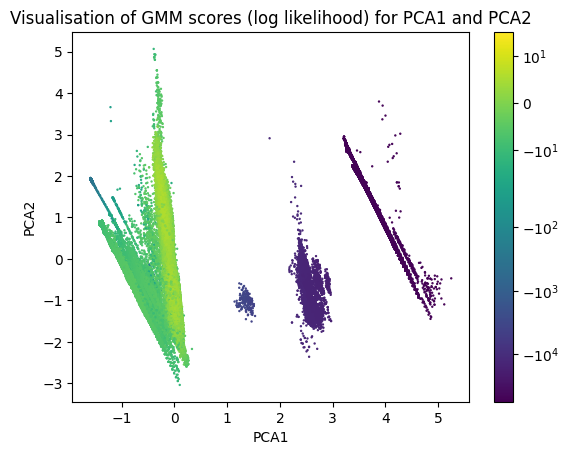

In [98]:
from matplotlib.colors import SymLogNorm

norm = SymLogNorm(linthresh=15,vmin=-55000, vmax=15)

plt.scatter(comb_df["pca1"].values, comb_df["pca2"].values, c=comb_df["score"].values, s=0.5, norm=norm)
plt.title("Visualisation of GMM scores (log likelihood) for PCA1 and PCA2")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar()
plt.show()

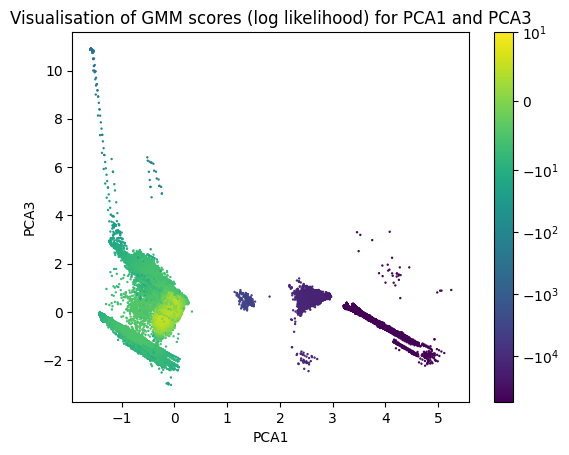

In [99]:
from matplotlib.colors import SymLogNorm

norm = SymLogNorm(linthresh=10,vmin=-55000, vmax=10)

plt.scatter(comb_df["pca1"].values, comb_df["pca3"].values, c=comb_df["score"].values, s=0.5, norm=norm)
plt.title("Visualisation of GMM scores (log likelihood) for PCA1 and PCA3")
plt.xlabel("PCA1")
plt.ylabel("PCA3")
plt.colorbar()
plt.show()